In [1]:
import pandas as pd
import numpy as np

## Importing Data

In [2]:
df = pd.read_csv('/content/spam_classifier.csv',encoding='Windows-1252')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning


In [4]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.duplicated().sum()

403

In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [9]:
df['target'] = en.fit_transform(df['target'])

In [ ]:
df.sample(5)

,target,text
2662,1,Hello darling how are you today? I would love ...
2639,0,Why she wants to talk to me
3554,1,From next month get upto 50% More Calls 4 Ur s...
339,0,U calling me right? Call my hand phone...
71,0,Finished class where are you.


In [ ]:
df.shape

(5169, 2)

## EDA

In [10]:
df['target'].value_counts()

,count
target,
0,4516
1,653


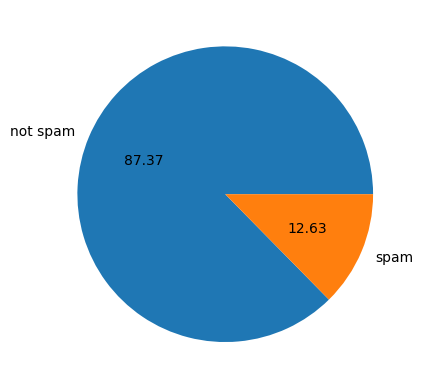

In [ ]:
# The data is imbalanced
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [11]:
# counting each chararcter ie letter, space, or any numeric or expressions
df['num_char'] = df['text'].apply(len)

In [12]:
!pip install nltk

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [15]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
#describing each kind of message


In [ ]:
#spam
df[df['target'] == 1][['num_char',	'num_words'	,'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
#not spam
df[df['target'] == 0][['num_char',	'num_words'	,'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


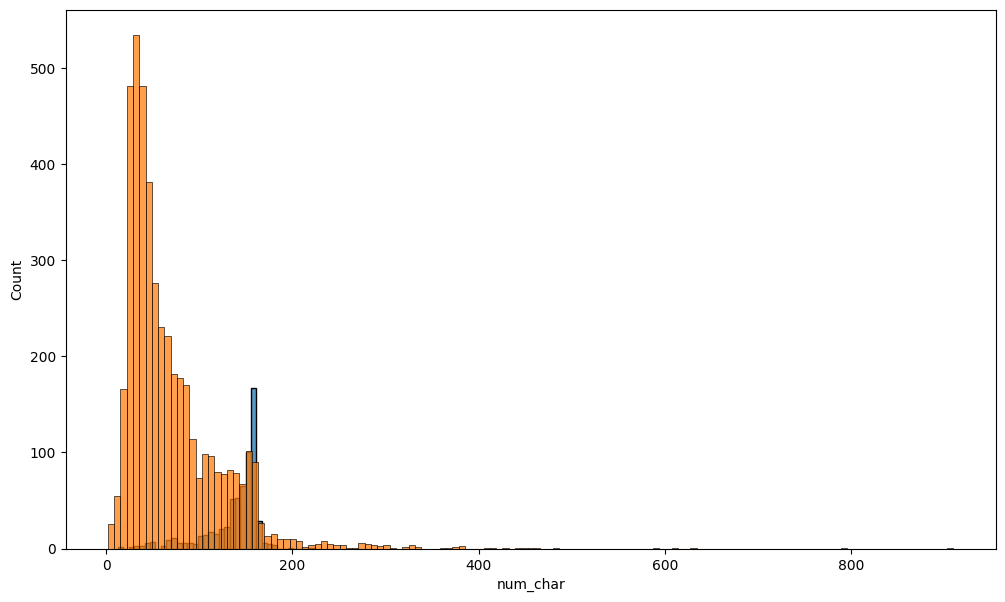

In [ ]:
#plotting histogram
#number of characters
import seaborn as sns
plt.figure(figsize=(12,7))
sns.histplot(df[df['target'] == 1]['num_char'])
sns.histplot(df[df['target'] == 0]['num_char'])
plt.show()


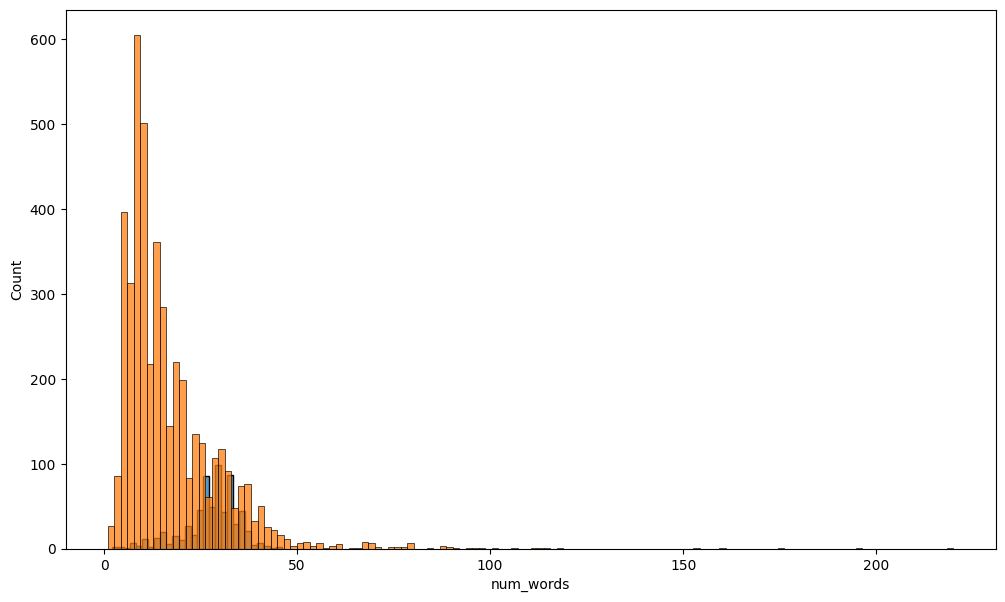

In [ ]:
#number of words
import seaborn as sns
plt.figure(figsize=(12,7))
sns.histplot(df[df['target'] == 1]['num_words'])
sns.histplot(df[df['target'] == 0]['num_words'])
plt.show()

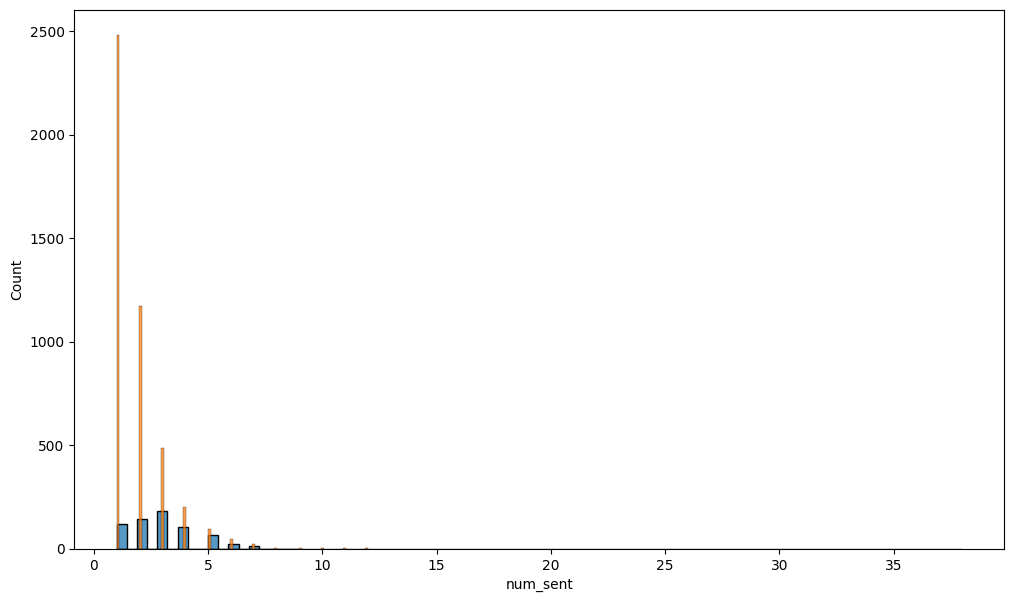

In [ ]:
#number of sentencess
import seaborn as sns
plt.figure(figsize=(12,7))
sns.histplot(df[df['target'] == 1]['num_sent'])
sns.histplot(df[df['target'] == 0]['num_sent'])
plt.show()

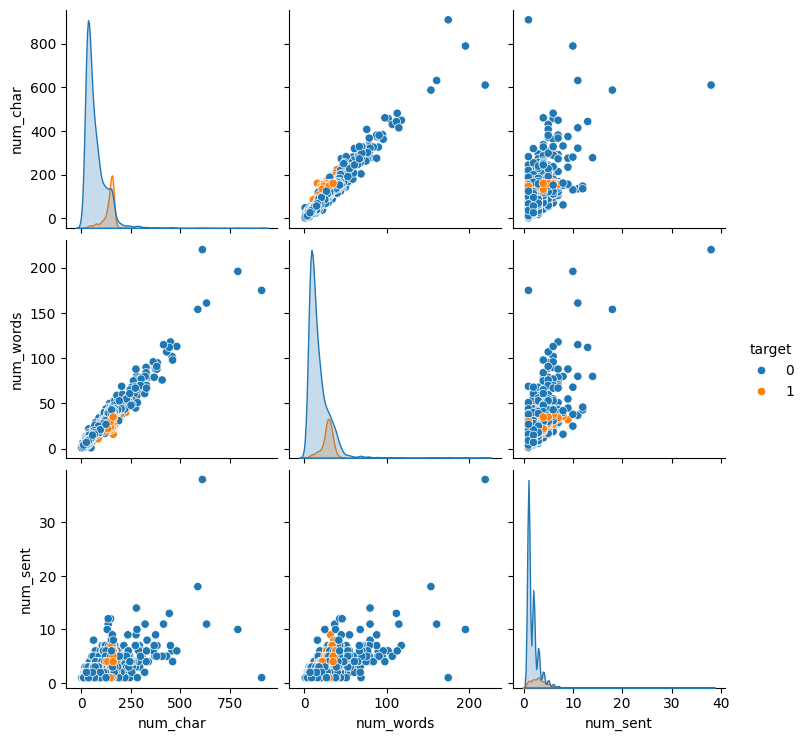

In [ ]:
sns.pairplot(df, hue='target')

<Axes: >

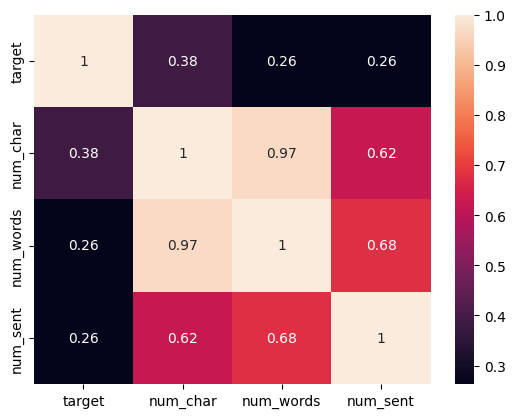

In [ ]:
sns.heatmap(df[['target','num_char','num_words','num_sent']].corr(),annot=True)

## Text Preprocessing

Lower case

Tokenize

remove special characters

remove stop words and punctuation

stemming








In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

import string

from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def text_preprocess(text):

  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()


  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i))
  text = y[:]
  y.clear()


  return " ".join(text)



In [18]:
# Example
text_preprocess('i am a very nice person i, love to dance and singing and writing! ?')

'nice person love danc sing write'

In [19]:
df['transformed_text'] = df['text'].apply(text_preprocess)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [20]:
# Creating a word cloud
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [21]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

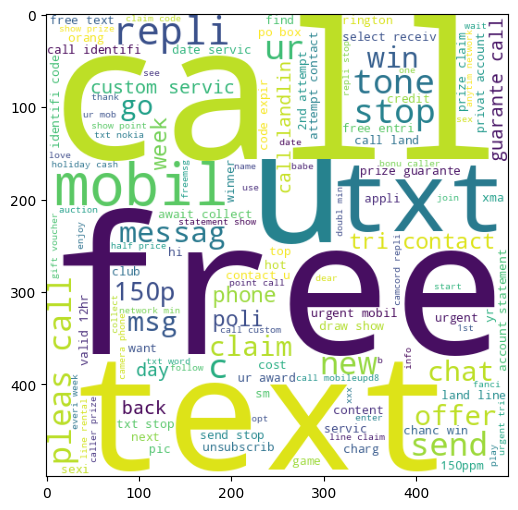

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

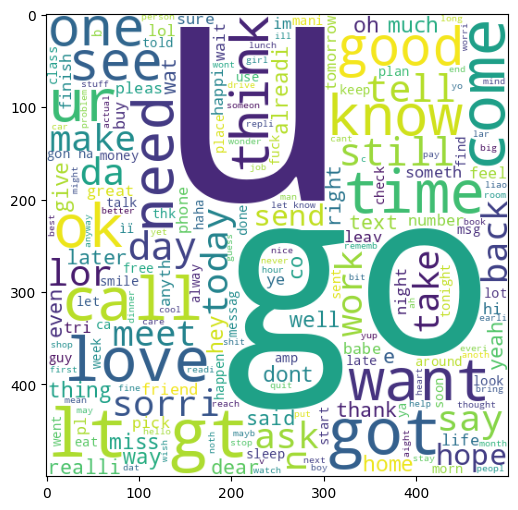

In [24]:
not_spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(not_spam_wc)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Finding the top 30 most common words

In [25]:
# spam
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)



In [ ]:
len(spam_corpus)

9939

In [26]:
from collections import Counter
spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

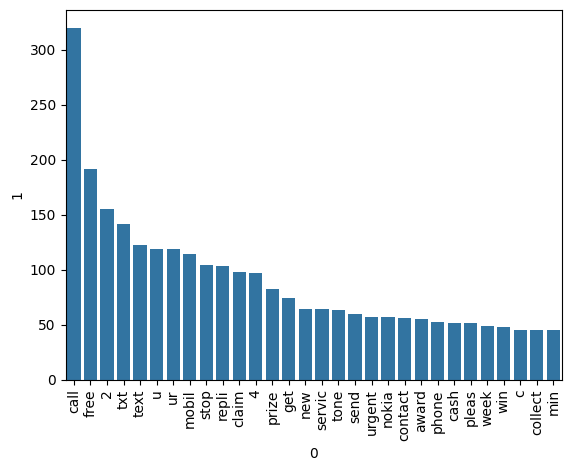

In [ ]:

sns.barplot(x = spam_words[0],y = spam_words[1])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
not_spam_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    not_spam_corpus.append(word)

In [28]:
not_spam_words = pd.DataFrame(Counter(not_spam_corpus).most_common(30))

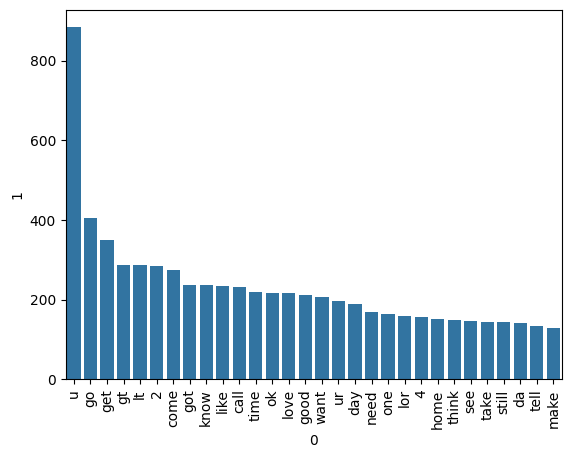

In [ ]:
sns.barplot(x = not_spam_words[0],y = not_spam_words[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [30]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [31]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [32]:
x.shape

(5169, 3000)

In [33]:
y = df['target'].values

In [34]:
y.shape

(5169,)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [37]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [38]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# hieghest precision

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
#tfidf -> mnb

In [ ]:
# Testing all the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {'SVC': svc,
        'KNN': knc,
        'NB': mnb,
        'DT': dtc,
        'LR': lrc,
        'RF': rfc,
        'Ada boost': abc,
        'BC': bc,
        'ETC': etc,
        'Grad Boost': gbdt,
        'XG Boost': xgb}

In [ ]:
# def train_classifier(clf,x_train,y_train,x_test,y_test):
#   clf.fit(x_train,y_train)
#   y_pred = clf.predict(x_test)
#   accuracy = accuracy_score(y_test,y_pred)
#   precision = precision_score(y_test,y_pred)
#   return accuracy, precision


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_classifier(clf, x_train, y_train, x_test, y_test):
    # Fit the classifier to the training data
    clf.fit(x_train, y_train)

    # Predict the labels for the test data
    y_pred = clf.predict(x_test)

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    return accuracy, precision



In [ ]:
#train_classifier(mnb,x_train,y_train,x_test,y_test)

In [ ]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


In [ ]:
performance_df = pd.DataFrame({'algorithm':clfs.keys(),'accuracy':accuracy_scores,'precision':precision_scores}).sort_values('precision',ascending=False)

In [ ]:
performance_df

,algorithm,accuracy,precision
1,KNN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,Ada boost,0.961315,0.945455
10,XG Boost,0.972921,0.943548
4,LR,0.951644,0.940000
9,Grad Boost,0.952611,0.923810
7,BC,0.958414,0.862595


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "algorithm")

In [ ]:
performance_df1

,algorithm,variable,value
0,KNN,accuracy,0.900387
1,NB,accuracy,0.959381
2,RF,accuracy,0.971954
3,ETC,accuracy,0.972921
4,SVC,accuracy,0.972921
5,Ada boost,accuracy,0.961315
6,XG Boost,accuracy,0.972921
7,LR,accuracy,0.951644
8,Grad Boost,accuracy,0.952611
9,BC,accuracy,0.958414


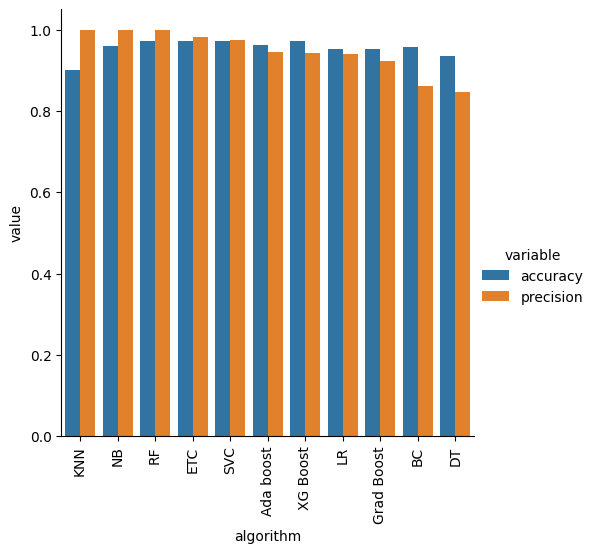

In [ ]:
sns.catplot(x='algorithm', y='value', data=performance_df1, hue= 'variable', kind='bar')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Improving the model
# count vector -> max_features=3000

In [ ]:
temp_df = pd.DataFrame({'algorithm':clfs.keys(),'accuracy_max_features_3000':accuracy_scores,
                        'precision_max_features_3000':precision_scores}).sort_values('precision_max_features_3000',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='algorithm')

In [ ]:
new_df

,algorithm,accuracy,precision,accuracy_max_features_3000,precision_max_features_3000
0,KNN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,Ada boost,0.961315,0.945455,0.960348,0.929204
6,XG Boost,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,Grad Boost,0.952611,0.923810,0.946809,0.919192
9,BC,0.958414,0.862595,0.958414,0.868217


In [ ]:
#voting classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb  = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [39]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))